# Topo - Convert a geopandas geodataframe to a pyvista unstructured grid
O. KAUFMANN, 2021.  
gdf_to_ug is based on ideas from https://hatarilabs.com/ih-en/tutorial-to-convert-geospatial-data-shapefile-to-3d-data-vtk-with-python-geopandas-pyvista

In [1]:
#import required packages
from bootsoff.topo.geometry import gdf_to_ug
import numpy as np
import pyvista as pv
import geopandas as gpd
from shapely.geometry import Point, LineString, Polygon 

## Create geodataframes from points, lines and polygon shapefiles

In [2]:
gdf_points = gpd.read_file('./data_gis/wellPoints.shp')
gdf_lines = gpd.read_file('./data_gis/contoursLines.shp')
gdf_polygons = gpd.read_file('./data_gis/lakesPolygons.shp')

## Merge all datasets into a single geodataframe

In [3]:
gdf = gdf_points.append(gdf_lines)
gdf = gdf.append(gdf_polygons)

## Convert to an unstructured grid

In [4]:
unstructured_grid = gdf_to_ug(gdf, elevation='Elev')
unstructured_grid

UnstructuredGrid (0x7efc4703e0a0)
  N Cells:	693
  N Points:	228530
  X Bounds:	4.544e+05, 6.429e+05
  Y Bounds:	4.777e+06, 4.887e+06
  Z Bounds:	6.512e+02, 2.600e+03
  N Arrays:	1

## Display the unstructured grid

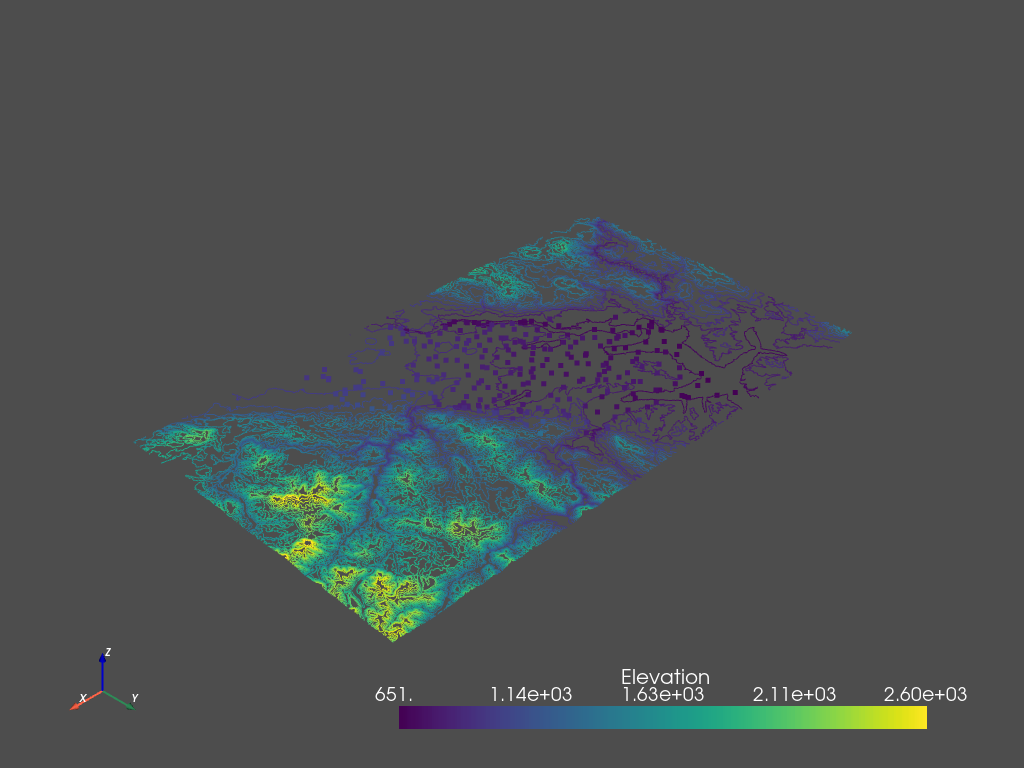

In [5]:
unstructured_grid.plot(jupyter_backend='static')

## Save the unstructured grid into a VTK file 

In [6]:
unstructured_grid.save('./tmp_files/test.vtu', binary=False)